In [44]:
import random
import math 

class Herbivore: 
    # setting base rates and max age (age is turn)
    mutation_drift = 1
    fertility_rate = .25
    max_age = 4
    
    # spawns a creature with a base survial age
    def __init__(self, survival_skill):
        self.age = 0
        self.survival_skill = survival_skill
    
    # adds one year to the age of the animal
    def _age(self):
        self.age +=1
   
    # determine whether or not the animal breads, and returns 
    # a new instance of the object with a survival skill = to the mutation
    def breed(self):
        # gives a drift amount between -drift and +drift
        drift = random.randint(-1*self.mutation_drift, 
                  self.mutation_drift)
        
        # mutation is determined by the survial skill plus the drift
        mutation = self.survival_skill + drift
        
        
        return self.__class__(survival_skill=mutation)
    def __str__(self) -> str:
        return f'Animal is {self.age} and has survival skill of {self.survival_skill}'

# making an island for the animals
class Island:
    
    stats = dict()
    animals = list()
    max_pop, year = 0, 0 
    
    # creates a island with a population with random survival skills
    def __init__(self, initial_pop=10, max_pop=2500):
        self.year = 0
        self.max_pop = max_pop
        self.stats = dict()
        
        self.animals = [Herbivore(survival_skill = random.randint(0,100)) for _ in range(initial_pop)] 
        
    def _simulate(self):
        new_animals = list()
        pop = len(self.animals)
        
        # suffles the order of the animals
        random.shuffle(self.animals)
        
        # for all animals in the population
        for animal in self.animals:
            # step 1. breeding
            if pop <= self.max_pop:
                if random.random() <= animal.fertility_rate:
                    new_animals.append(animal.breed())
                    pop += 1
            
            # step 2. Aging and dying
            animal._age()
            if animal.age <= animal.max_age: # dies of age
                new_animals.append(animal)
    
        self.animals = new_animals
    def _collect_stats(self): 
        '''run island statistics'''
        
        # collecting the stats of the population of the current animals
        year_stats = {'pop': len(self.animals)} 
        
        # if there is animals in the list
        if len(self.animals) > 0:
            # recording the ages, survival skills and the num animals with a skill above
            # 75
            ages, skills, ss_75 = zip(*[(a.age, a.survival_skill, 
                (a.survival_skill>75)) for a in self.animals])
            
            # collecting the ages and the skills
            if sum(ages) > 0:
                year_stats['mean_age'] = sum(ages) / year_stats['pop']
                year_stats['mean_skill'] = sum(skills) / year_stats['pop']
                year_stats['75_skill'] = sum(ss_75) / year_stats['pop']
            else:
                year_stats['mean_age'] = 0
                year_stats['mean_skill'] = 0
                year_stats['75_skill'] = 0

            self.stats[self.year] = year_stats
            
    def compute_epoches(self, years):
        # for the years in the epoch
        for _ in range(years):
            # simulate the breeding and survival strat
            self._simulate()
            # collect the stats of the island
            self._collect_stats()
            
            # add one to the year
            self.year += 1
        
        # retunr the stats
        return self.stats

class HarshIsland(Island):
    '''same as Island, except 
    has harsh conditions within [e_min,e_max] interval.
    Rabbits with survival skill below the condition die at the 
    beginning of the epoch
    '''
    
    # sets the same conditions as before with added enviromental range variables
    def __init__(self, env_range, **kwargs):
        self.env_range = env_range
        super().__init__(**kwargs)
    
    # defines the environment 
    def _compute_env(self):
        condition = random.randint(*self.env_range)
        self.animals = [a for a in self.animals if a.survival_skill >= 
                        condition]
    
    # adding the extract step to the new class
    def _simulate(self):
        self._compute_env()
        super()._simulate()    

In [31]:
A = Herbivore(10)

A.age

random.seed(123)
A2 = A.breed()
A2.survival_skill

I = Island(initial_pop=10, max_pop=100)


In [37]:
# checking to make sure the generation worked
print(I.year)
print(len(I.animals))

# running the simulation
stats = I.compute_epoches(15)

# printing the results of the simulation
print(stats)


30
73
{0: {'pop': 14, 'mean_age': 0.7692307692307693, 'mean_skill': 54.07692307692308, '75_skill': 0.14285714285714285}, 1: {'pop': 18, 'mean_age': 1.411764705882353, 'mean_skill': 53.94117647058823, '75_skill': 0.16666666666666666}, 2: {'pop': 23, 'mean_age': 1.9090909090909092, 'mean_skill': 49.31818181818182, '75_skill': 0.13043478260869565}, 3: {'pop': 26, 'mean_age': 2.6, 'mean_skill': 45.88, '75_skill': 0.11538461538461539}, 4: {'pop': 24, 'mean_age': 1.7826086956521738, 'mean_skill': 48.95652173913044, '75_skill': 0.16666666666666666}, 5: {'pop': 27, 'mean_age': 1.7307692307692308, 'mean_skill': 46.15384615384615, '75_skill': 0.14814814814814814}, 6: {'pop': 29, 'mean_age': 1.8571428571428572, 'mean_skill': 43.357142857142854, '75_skill': 0.10344827586206896}, 7: {'pop': 30, 'mean_age': 1.9310344827586208, 'mean_skill': 46.44827586206897, '75_skill': 0.16666666666666666}, 8: {'pop': 36, 'mean_age': 2.0285714285714285, 'mean_skill': 47.82857142857143, '75_skill': 0.16666666666666

In [38]:
# creating a bunch of runs of the simulation
params = {
    'initial_pop': 10,
    'max_pop': 100
}

# setting up the length and number of times to simulate
years, N_islands = 15, 1000

# passing all of the generations into a list
islands = [Island(**params) for _ in range(N_islands)]

# generating the stats of each island
stats = [islands.compute_epoches(years) for islands in islands]

## Generation with a the new harsh islands

In [45]:
# setting the environment range
params['env_range'] = [20, 80]

# running the simulation with the same year and island variables
h_islands = [HarshIsland(**params) for _ in range(N_islands)]

# getting the stats of the new harsh islands
h_stats = [island.compute_epoches(years) for island in h_islands]



## Visualizing the island that we just created

In [47]:
# grabbing the graphing library
from matplotlib import pylab as plt
 
# setting the style
plt.style.use('fivethirtyeight')


## Grabbing the the island Data From Above

In [49]:
# passing the stats dicts into another dictonary
datas = {
    'Heaven Islands': stats,
    'HarshIsland': h_stats
}

# setting the colors
colors = {
    'Heaven Islands': 'blue',
    'HarshIsland': 'red'
}



## Graphing the data


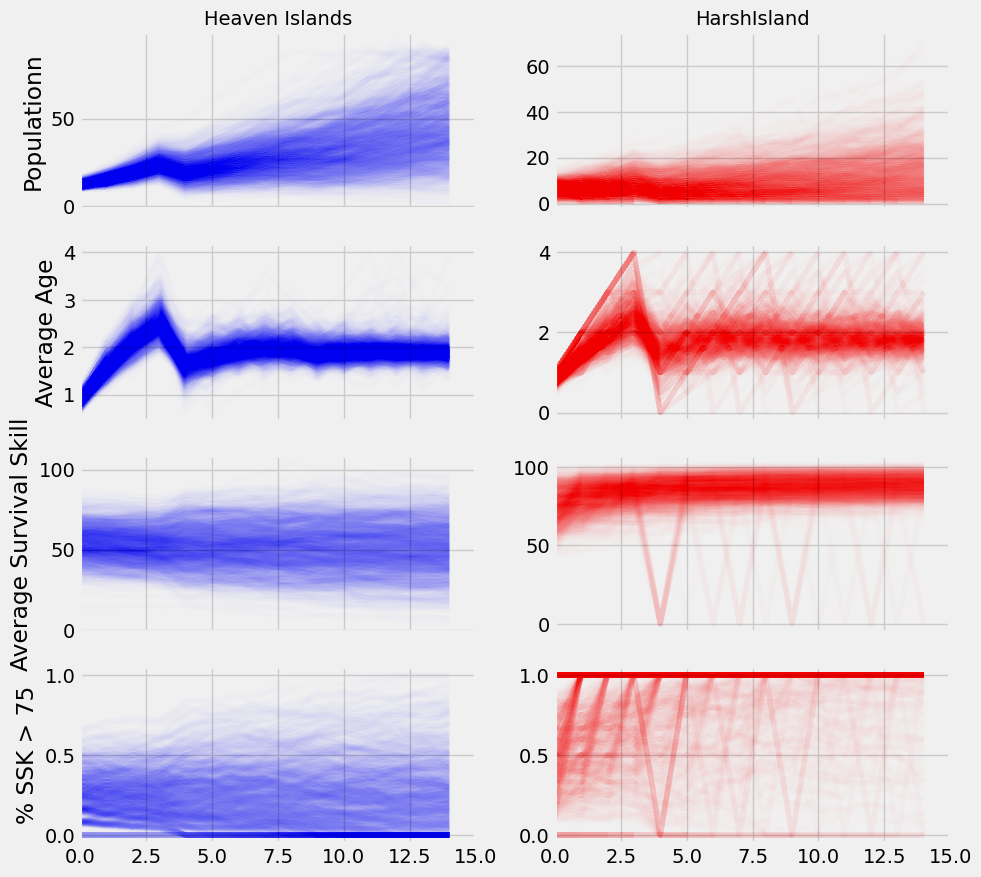

In [53]:
# setting up the grid of graphs
fig, axes = plt.subplots(4,2, figsize = (10,10), sharex = True)

# setting the y-axis for each population
for i, title in enumerate(('Populationn', 'Average Age', 'Average Survival Skill',
                           '% SSK > 75')):
    axes[i][0].set_ylabel(title)
    axes[i][0].set_xlim(0,15)
    axes[i][1].set_xlim(0,15)

# iterate over each island and plot the data
for i, (k, v) in enumerate(datas.items()):
    # set the title for each island
    axes[0][i].set_title(k, fontsize=14)

    for s in v: # for each island
        years = list(s.keys())
        
        # plot the population data
        axes[0][i].plot(years, [v['pop'] for v in s.values()], 
                        c=colors[k], alpha=.007)
        
        # plot the average age data
        axes[1][i].plot(years, [v.get('mean_age', None) 
            for v in s.values()], c=colors[k], alpha=.007)
        
        # plot the average survival skill data
        axes[2][i].plot(years, [v.get('mean_skill', None) 
            for v in s.values()], c=colors[k], alpha=.007)
        
        # plot the percentage of individuals with survival skill above 75
        axes[3][i].plot(years, [v.get('75_skill', None) 
            for v in s.values()], c=colors[k], alpha=.007)
